# INTRODUCCION A CLUSTERING

## <u>Métodos No Supervisados

## Comparación de Cluster solo Usando la métrica de Silueta (Clustering Jerárquico, PAM y K-means)

#### Librerias

In [3]:
from pyclustering.cluster.clarans import clarans;
from pyclustering.utils import timedcall;
from pyclustering.cluster.kmedoids import kmedoids;
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")


In [4]:
basket = pd.read_csv("datos/DATA/jugadores_basket.csv")
basket.head(8)

,nombres,apellidos,asisten_porcen_minuto,talla,tiempo_juego,edad,puntos_porcen_minuto
0,James,Smith,0.0888,201,36.02,28,0.5885
1,Stephen,Johnson,0.1399,198,39.32,30,0.8291
2,Kevin,Williams,0.0747,198,38.80,26,0.4974
3,Giannis,Brown,0.0983,191,40.71,30,0.5772
4,LeBron,Jones,0.1276,196,38.40,28,0.5703
5,Kawhi,Garcia,0.1671,201,34.10,31,0.5835
6,Luka,Miller,0.1906,193,36.20,30,0.5276
7,Joel,Davis,0.1061,191,36.75,27,0.5523


In [6]:
basket.shape

(96, 7)

### Variables

- asisten_porcen_minuto:    
Asistencia porcentual por minuto = (Asistencias / Minutos jugados)    
Es una estadística útil para evaluar la habilidad de un jugador para generar oportunidades de anotación para sus compañeros. Puede ayudar a identificar jugadores con habilidades de visión de juego y capacidad para distribuir el balón eficientemente. Sin embargo, es importante tener en cuenta que esta métrica no tiene en cuenta otros factores como la calidad de los compañeros de equipo, la estrategia del equipo o el estilo de juego individual.

- talla: Talla del jugador en cm
- tiempo_juego: Tiempo en el juego en minutos
- edad: Edad del jugador en años
- puntos_porcen_minuto:     
Puntos por minuto = Puntos anotados / Minutos jugados   
Esta métrica puede ser útil para evaluar la capacidad anotadora de un jugador y su eficiencia en términos de puntos por tiempo en la cancha.


### Analizamos la data

In [7]:
basket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   nombres                96 non-null     object 
 1   apellidos              96 non-null     object 
 2   asisten_porcen_minuto  96 non-null     float64
 3   talla                  96 non-null     int64  
 4   tiempo_juego           96 non-null     float64
 5   edad                   96 non-null     int64  
 6   puntos_porcen_minuto   96 non-null     float64
dtypes: float64(3), int64(2), object(2)
memory usage: 5.4+ KB


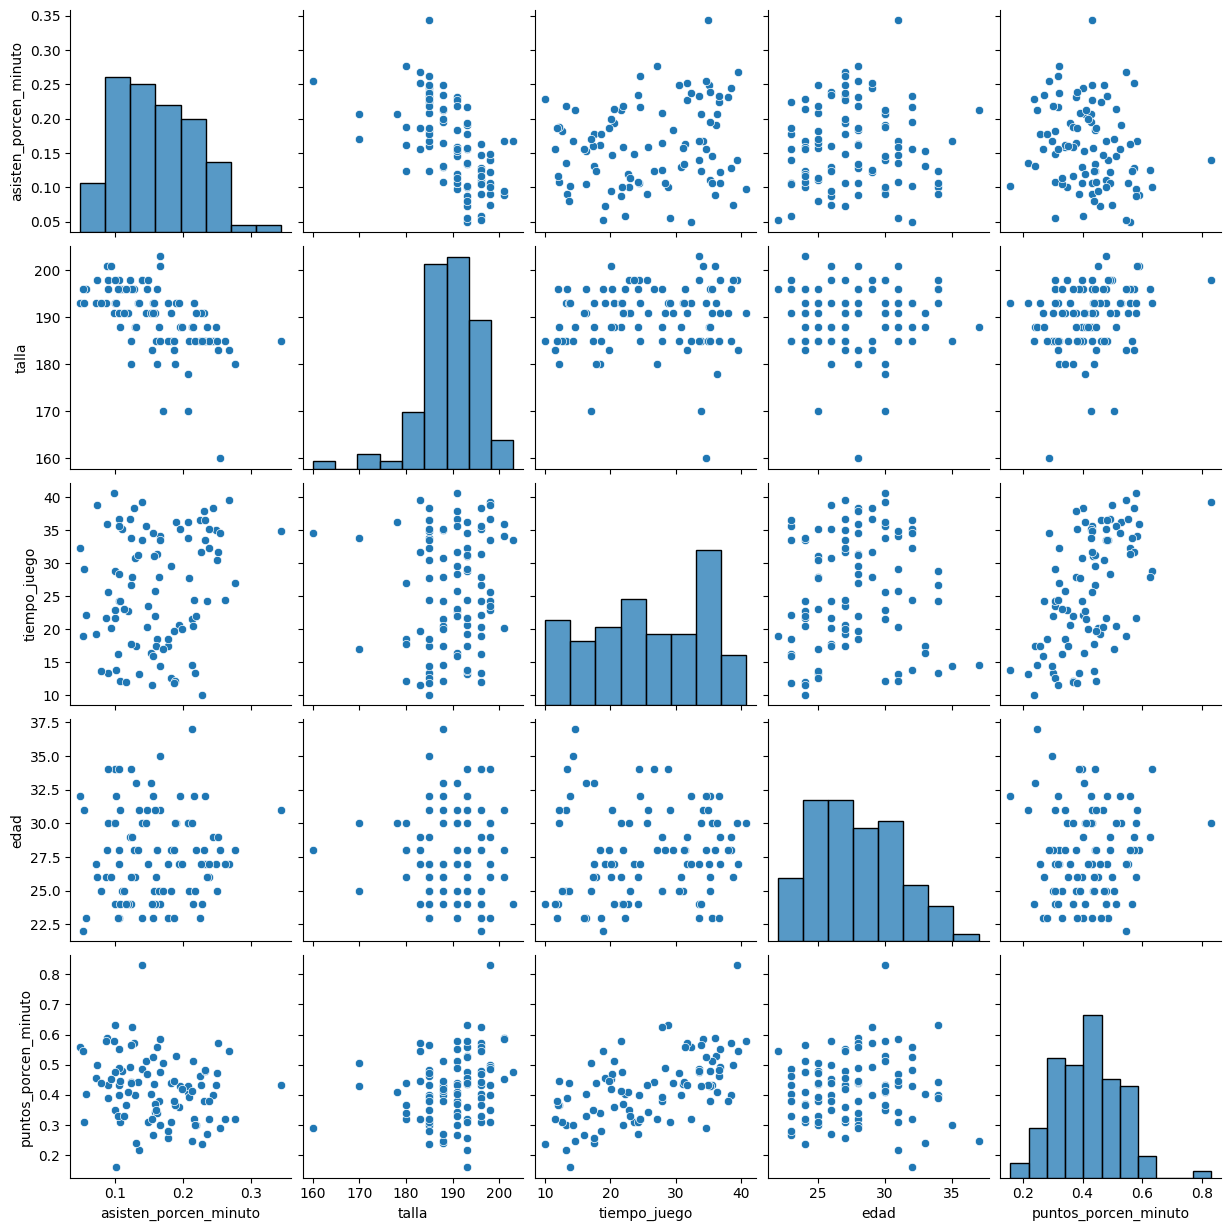

In [8]:
sns.pairplot(basket)

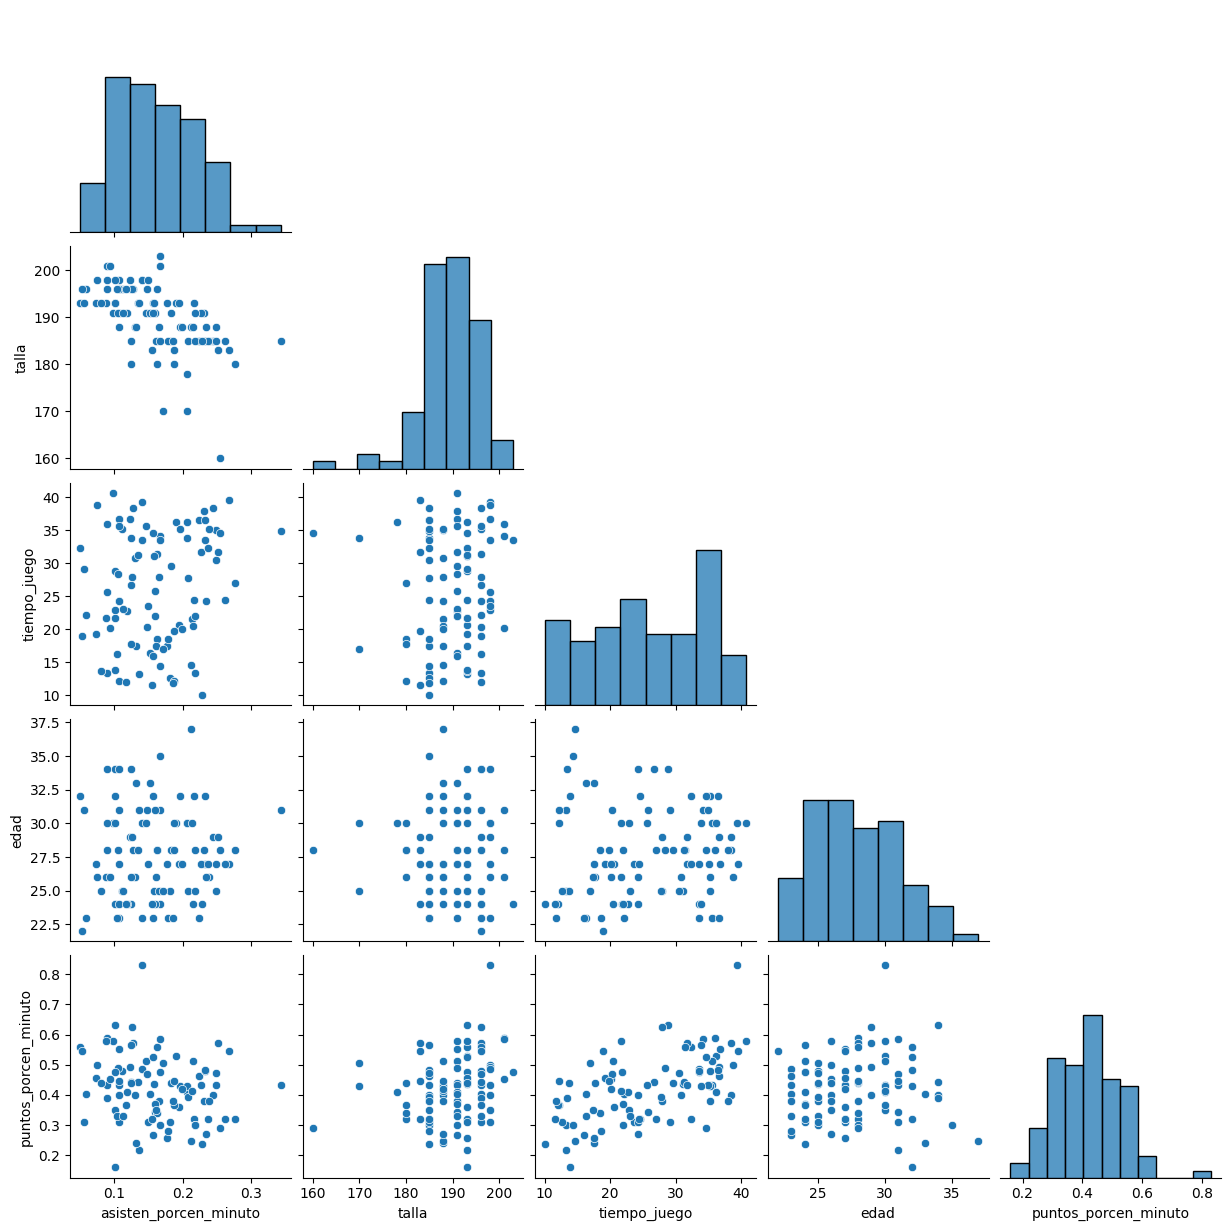

In [9]:
sns.pairplot(basket, corner=True)

In [10]:
basket.describe()

,asisten_porcen_minuto,talla,tiempo_juego,edad,puntos_porcen_minuto
count,96.000000,96.000000,96.000000,96.000000,96.000000
mean,0.161289,189.875000,25.944375,27.739583,0.420268
std,0.059793,6.960414,8.621110,3.325325,0.108863
min,0.049400,160.000000,10.080000,22.000000,0.159300
25%,0.109825,185.000000,18.852500,25.000000,0.338425
50%,0.158400,191.000000,25.710000,27.000000,0.428250
75%,0.209475,196.000000,33.935000,30.000000,0.483075
max,0.343700,203.000000,40.710000,37.000000,0.829100


In [11]:
basket.describe(include=['object'])

,nombres,apellidos
count,96,96
unique,93,87
top,Kevin,Sanchez
freq,3,3


In [12]:
basket[basket['nombres']=='Kevin']

,nombres,apellidos,asisten_porcen_minuto,talla,tiempo_juego,edad,puntos_porcen_minuto
2,Kevin,Williams,0.0747,198,38.80,26,0.4974
67,Kevin,Kelly,0.2187,191,21.95,28,0.3007
90,Kevin,Cox,0.1706,170,17.00,25,0.5059


In [13]:
basket[basket['apellidos']=='Sanchez']

,nombres,apellidos,asisten_porcen_minuto,talla,tiempo_juego,edad,puntos_porcen_minuto
31,Deandre,Sanchez,0.3437,185,34.91,31,0.4325
89,Keldon,Sanchez,0.1994,188,20.06,27,0.4187
93,Luis,Sanchez,0.1778,185,18.56,23,0.2802


In [14]:
identificadores = basket[['nombres','apellidos']]
basket = basket[['asisten_porcen_minuto','talla','tiempo_juego','edad',	'puntos_porcen_minuto']]

In [15]:
identificadores

,nombres,apellidos
0,James,Smith
1,Stephen,Johnson
2,Kevin,Williams
3,Giannis,Brown
4,LeBron,Jones
...,...,...
91,Jorge,Diaz
92,Manuel,Richardson
93,Luis,Sanchez
94,Felix,Wright


In [16]:
basket

,asisten_porcen_minuto,talla,tiempo_juego,edad,puntos_porcen_minuto
0,0.0888,201,36.02,28,0.5885
1,0.1399,198,39.32,30,0.8291
2,0.0747,198,38.80,26,0.4974
3,0.0983,191,40.71,30,0.5772
4,0.1276,196,38.40,28,0.5703
...,...,...,...,...,...
91,0.1554,183,11.58,24,0.3195
92,0.2282,185,10.08,24,0.2381
93,0.1778,185,18.56,23,0.2802
94,0.1863,185,11.81,23,0.3810


## Clustering Jerarquico

### Normalizamos los datos
La normalización es un cambio de escala de los datos del rango original para que todos los valores estén dentro del nuevo rango de 0 y 1. 
$$x_{normalizado}= (x – min) / (max – min)$$  
Donde los valores mínimo y máximo pertenecen al valor x que se está normalizando.

In [17]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler: Transforme las variables escalando cada una de ellas a un rango determinado.
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(basket)

# Aplicar la transformación de normalización a los datos en basket
normalized = scaler.transform(basket)

normalized1 = pd.DataFrame(normalized,columns=list(basket.columns))
zscore_df = normalized1
zscore_df.head(10)

,asisten_porcen_minuto,talla,tiempo_juego,edad,puntos_porcen_minuto
0,0.133877,0.953488,0.846882,0.400000,0.640788
1,0.307509,0.883721,0.954620,0.533333,1.000000
2,0.085967,0.883721,0.937643,0.266667,0.504778
3,0.166157,0.720930,1.000000,0.533333,0.623918
4,0.265715,0.837209,0.924584,0.400000,0.613616
5,0.399932,0.953488,0.784198,0.600000,0.633323
6,0.479783,0.767442,0.852759,0.533333,0.549866
7,0.192661,0.720930,0.870715,0.333333,0.586742
8,0.663269,0.581395,0.925563,0.466667,0.360406
9,0.399592,1.000000,0.765916,0.133333,0.474321


### Estandarizamos los datos
Un valor se estandariza de la siguiente manera: 
$$x_{estadarizado} = (x – media) / sd$$

Donde la media se calcula como: $$media = suma(x) / cuenta(x)$$ Y la desviación_estándar se calcula como: $$sd = raíz cuadrada (suma ((x – media) ^ 2) / cuenta (x))$$

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler = scaler.fit(basket)

# Aplicar la transformación de estandarización a los datos en "basket"
standarizar = scaler.transform(basket)

standarizar1 = pd.DataFrame(standarizar,columns=list(basket.columns))
zscore_df1 = standarizar1
zscore_df1.head(10)

,asisten_porcen_minuto,talla,tiempo_juego,edad,puntos_porcen_minuto
0,-1.218687,1.606715,1.174850,0.078724,1.553464
1,-0.359587,1.173443,1.559641,0.683326,3.775175
2,-1.455738,1.173443,1.499007,-0.525878,0.712243
3,-1.058972,0.162477,1.721720,0.683326,1.449120
4,-0.566376,0.884596,1.452366,0.078724,1.385405
5,0.097703,1.606715,0.950972,0.985628,1.507294
6,0.492788,0.451324,1.195839,0.683326,0.991111
7,-0.927837,0.162477,1.259971,-0.223577,1.219192
8,1.400643,-0.704066,1.455864,0.381025,-0.180689
9,0.096022,1.895562,0.885674,-1.130480,0.523868


## Dendograma

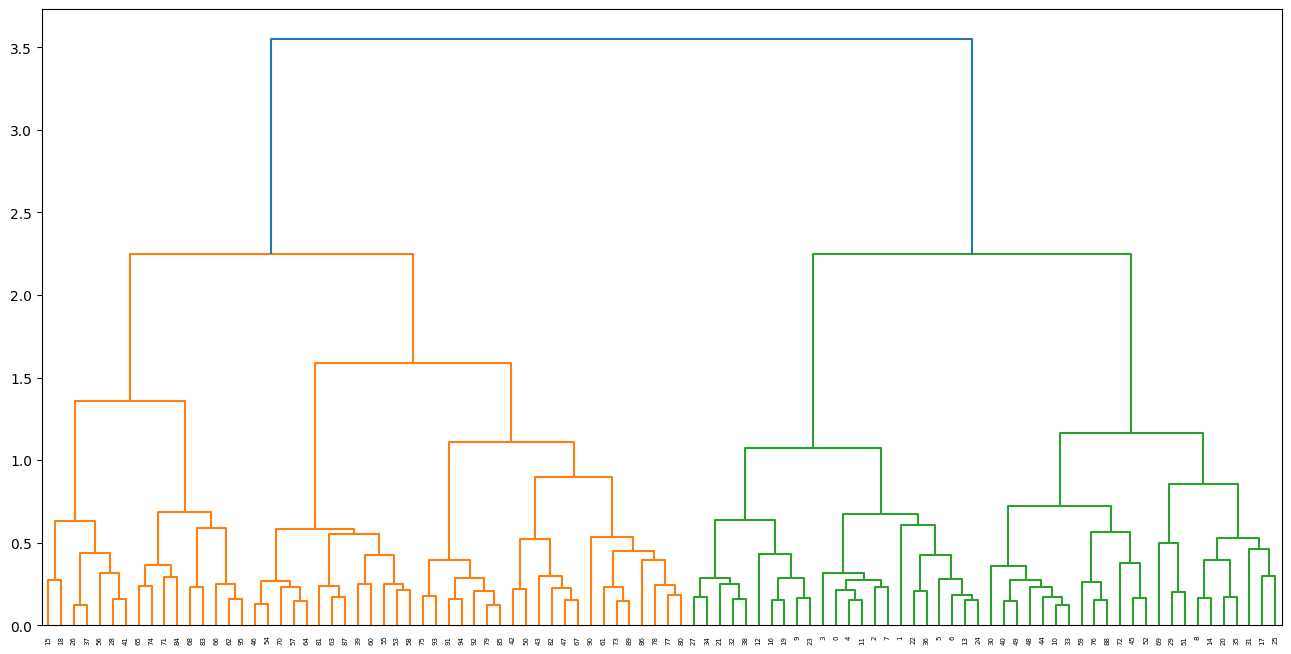

In [19]:
from scipy.cluster.hierarchy import dendrogram, linkage  
from matplotlib import pyplot as plt

seed = 16
np.random.seed(seed)

linked = linkage(zscore_df,method = 'ward')

labelList = range(1, 11)

plt.figure(figsize=(16, 8))  

## Se genera el dendrograma utilizando la función dendrogram de scipy.cluster.hierarchy
dendrogram(linked)
plt.show()  

## Construimos el Modelo Jerarquico con 4 cluster

In [20]:
from sklearn.cluster import AgglomerativeClustering

seed = 16
np.random.seed(seed)

cluster_Ag = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
# ward: método de la varianza mínima. Tenemos otros como single, average, complete
cluster_Ag.fit_predict(zscore_df)   ## Recordar que aca se reemplaza su dataframe

array([2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 3, 1, 2, 3, 1, 2, 3, 2,
       2, 2, 2, 3, 1, 2, 1, 3, 3, 3, 2, 3, 2, 3, 2, 1, 2, 0, 3, 1, 0, 0,
       3, 3, 0, 0, 3, 3, 0, 3, 3, 0, 0, 0, 1, 0, 0, 3, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 3, 0, 1, 3, 0, 1, 0, 3, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       3, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [21]:
label_ag = pd.DataFrame(cluster_Ag.labels_,columns= ['Cluster'])
cluster_Jerarq = pd.concat([basket,label_ag['Cluster']], axis=1)
cluster_Jerarq

,asisten_porcen_minuto,talla,tiempo_juego,edad,puntos_porcen_minuto,Cluster
0,0.0888,201,36.02,28,0.5885,2
1,0.1399,198,39.32,30,0.8291,2
2,0.0747,198,38.80,26,0.4974,2
3,0.0983,191,40.71,30,0.5772,2
4,0.1276,196,38.40,28,0.5703,2
...,...,...,...,...,...,...
91,0.1554,183,11.58,24,0.3195,0
92,0.2282,185,10.08,24,0.2381,0
93,0.1778,185,18.56,23,0.2802,0
94,0.1863,185,11.81,23,0.3810,0


In [22]:
cluster_Ag.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 3, 1, 2, 3, 1, 2, 3, 2,
       2, 2, 2, 3, 1, 2, 1, 3, 3, 3, 2, 3, 2, 3, 2, 1, 2, 0, 3, 1, 0, 0,
       3, 3, 0, 0, 3, 3, 0, 3, 3, 0, 0, 0, 1, 0, 0, 3, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 3, 0, 1, 3, 0, 1, 0, 3, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       3, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [23]:
cluster_Jerarq.columns

Index(['asisten_porcen_minuto', 'talla', 'tiempo_juego', 'edad',
       'puntos_porcen_minuto', 'Cluster'],
      dtype='object')

## Visualizacion en 2D

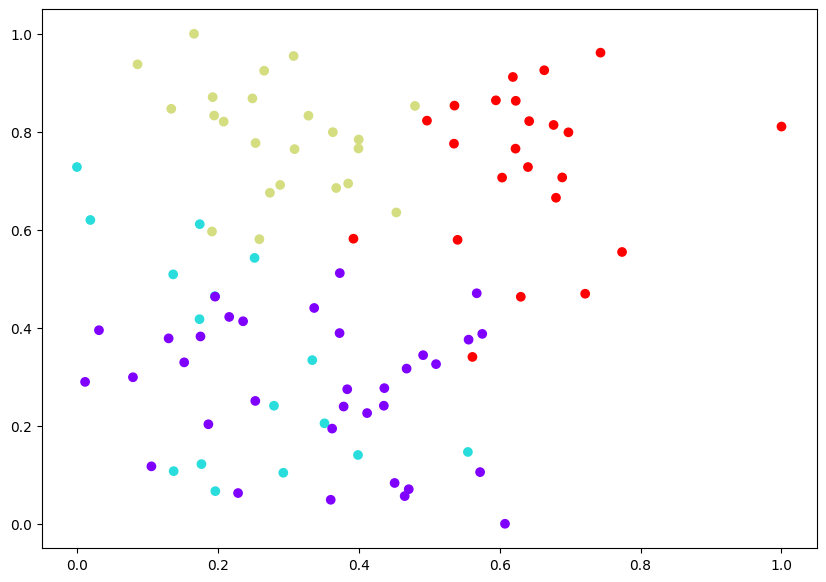

In [24]:
plt.figure(figsize=(10, 7))  
plt.scatter(zscore_df['asisten_porcen_minuto'], zscore_df['tiempo_juego'], c=cluster_Ag.labels_ , cmap='rainbow') 

## Visualizacion en 3D

In [27]:
pip install plotly

                                              0.0/15.6 MB ? eta -:--:--
                                              0.0/15.6 MB ? eta -:--:--
                                              0.4/15.6 MB 6.1 MB/s eta 0:00:03
     ----                                     1.9/15.6 MB 17.4 MB/s eta 0:00:01
     --------                                 3.5/15.6 MB 22.1 MB/s eta 0:00:01
     ------------                             4.9/15.6 MB 22.2 MB/s eta 0:00:01
     ----------------                         6.5/15.6 MB 24.3 MB/s eta 0:00:01
     --------------------                     7.9/15.6 MB 25.4 MB/s eta 0:00:01
     -----------------------                  9.4/15.6 MB 26.1 MB/s eta 0:00:01
     ------------------------                 9.8/15.6 MB 24.0 MB/s eta 0:00:01
     -------------------------               10.1/15.6 MB 22.2 MB/s eta 0:00:01
     -------------------------               10.3/15.6 MB 22.6 MB/s eta 0:00:01
     --------------------------              10.6/15.6 MB

In [29]:
import plotly.express as px

fig = px.scatter_3d(zscore_df, x='asisten_porcen_minuto', y='tiempo_juego', z='edad', color=cluster_Jerarq['Cluster'].astype(str))
fig.show()

### Métrica de Silueta

In [30]:
from sklearn.metrics import silhouette_score
silhouette_score(basket.values, cluster_Ag.labels_, metric='euclidean')

0.1938778728877288

## Usamos Kmedoides con P.A.M

Debemos de fijar la cantidad de cluster

In [31]:
seed = 16 # con esto definimos la semilla o con random_state
np.random.seed(seed)

kmedoids_instance = kmedoids(zscore_df.values, [3, 6, 4,10],random_state=16); ## para probar mas cluster solo agregar en
# la lista [3, 6, 4] aca seria para 3 cluster si quieres 4 agrega [3, 6, 4, 10] un valor cualesquiera por que son aleatorios

# Ejecutar el algoritmo K-Medoids y medir el tiempo de ejecución
(ticks, result) = timedcall(kmedoids_instance.process);
print("Tiempo de ejecución : ", ticks, "\n");

# retornando los clusters 
clusters_Kmed = kmedoids_instance.get_clusters();

# Devolviendo las medoides 
medoids = kmedoids_instance.get_medoids();

print("Índice de los puntos que pertenecen a un clúster:: ",clusters_Kmed)
print("Índice de los medoides que el algoritmo encontró como los mejores:", medoids)

Tiempo de ejecución :  0.004445000000487198 

Índice de los puntos que pertenecen a un clúster::  [[39, 43, 45, 46, 47, 53, 54, 55, 57, 58, 60, 63, 64, 67, 70, 72, 73, 75, 76, 77, 78, 79, 80, 81, 82, 85, 86, 87, 89, 90, 91, 92, 93, 94], [26, 37, 41, 42, 50, 61, 62, 65, 66, 68, 71, 74, 83, 84, 95], [0, 1, 2, 3, 4, 5, 6, 7, 9, 11, 13, 15, 16, 18, 19, 22, 23, 24, 27, 28, 32, 36, 38, 56], [8, 10, 12, 14, 17, 20, 21, 25, 29, 30, 31, 33, 34, 35, 40, 44, 48, 49, 51, 52, 59, 69, 88]]
Índice de los medoides que el algoritmo encontró como los mejores: [80, 74, 11, 33]


In [32]:
clusters_Kmed[0]

[39,
 43,
 45,
 46,
 47,
 53,
 54,
 55,
 57,
 58,
 60,
 63,
 64,
 67,
 70,
 72,
 73,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 85,
 86,
 87,
 89,
 90,
 91,
 92,
 93,
 94]

Adecuamos los cluster con etiquetas

In [38]:
# label = pd.DataFrame()
# for i in range(4):  
#     print(i)
#     a = pd.DataFrame(clusters_Kmed[i],columns = ['Index']) 
#     a['Cluster'] = i
#     label = label.append(a)

In [39]:
import pandas as pd

# Inicializar una lista para almacenar los DataFrames individuales
label_list = []

for i in range(4):
    print(i)
    # Crear DataFrame individual
    a = pd.DataFrame(clusters_Kmed[i], columns=['Index'])
    a['Cluster'] = i
    # Agregar el DataFrame a la lista
    label_list.append(a)

# Combinar todos los DataFrames en uno solo usando pd.concat
label = pd.concat(label_list, ignore_index=True)


0
1
2
3


In [40]:
label

,Index,Cluster
0,39,0
1,43,0
2,45,0
3,46,0
4,47,0
...,...,...
91,51,3
92,52,3
93,59,3
94,69,3


In [41]:
label_f = label.sort_values(by ='Index').reset_index(drop='true')
cluster_Med = pd.concat([basket,label_f['Cluster']], axis=1) # axis = 1 es por columnas
cluster_Med

,asisten_porcen_minuto,talla,tiempo_juego,edad,puntos_porcen_minuto,Cluster
0,0.0888,201,36.02,28,0.5885,2
1,0.1399,198,39.32,30,0.8291,2
2,0.0747,198,38.80,26,0.4974,2
3,0.0983,191,40.71,30,0.5772,2
4,0.1276,196,38.40,28,0.5703,2
...,...,...,...,...,...,...
91,0.1554,183,11.58,24,0.3195,0
92,0.2282,185,10.08,24,0.2381,0
93,0.1778,185,18.56,23,0.2802,0
94,0.1863,185,11.81,23,0.3810,0


In [42]:
cluster_Med.Cluster.value_counts()

Cluster
0    34
2    24
3    23
1    15
Name: count, dtype: int64

## Visualizacion en 2D

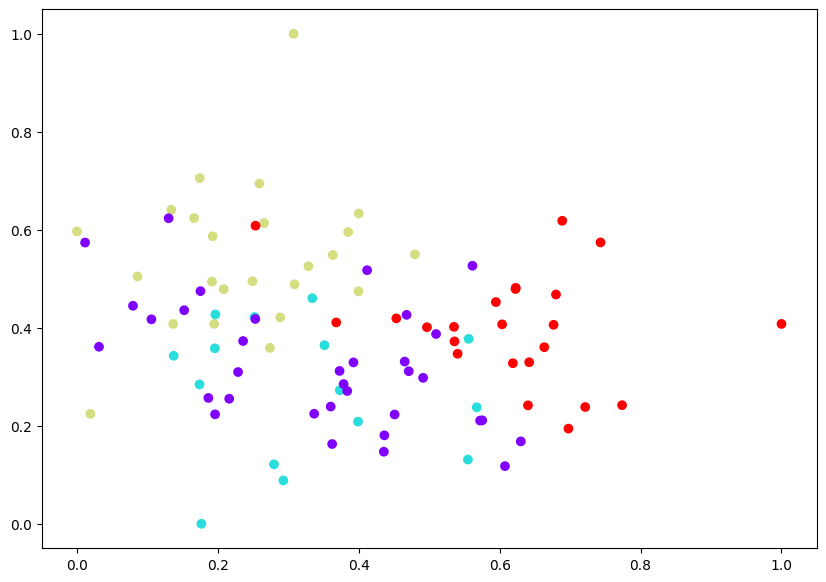

In [43]:
plt.figure(figsize=(10, 7))  
plt.scatter(zscore_df['asisten_porcen_minuto'], zscore_df['puntos_porcen_minuto'], c=cluster_Med.Cluster, cmap='rainbow') 

## Visualizacion en 3D

In [44]:
import plotly.express as px

fig = px.scatter_3d(zscore_df, x='asisten_porcen_minuto', y='tiempo_juego', z='edad', color=cluster_Med['Cluster'].astype(str))
fig.show()


In [45]:
# Crear un diccionario que mapee cada clúster a un nombre
cluster_names = {
    0: 'Cluster A',
    1: 'Cluster B',
    2: 'Cluster C',
    3: 'Cluster D'
    # Añade más clústeres y nombres si es necesario
}

# Añadir una nueva columna 'Nombre' en el DataFrame 'basket' con los nombres de clúster correspondientes
cluster_Med['Segmento'] = cluster_Med['Cluster'].map(cluster_names)

In [46]:
cluster_Med

,asisten_porcen_minuto,talla,tiempo_juego,edad,puntos_porcen_minuto,Cluster,Segmento
0,0.0888,201,36.02,28,0.5885,2,Cluster C
1,0.1399,198,39.32,30,0.8291,2,Cluster C
2,0.0747,198,38.80,26,0.4974,2,Cluster C
3,0.0983,191,40.71,30,0.5772,2,Cluster C
4,0.1276,196,38.40,28,0.5703,2,Cluster C
...,...,...,...,...,...,...,...
91,0.1554,183,11.58,24,0.3195,0,Cluster A
92,0.2282,185,10.08,24,0.2381,0,Cluster A
93,0.1778,185,18.56,23,0.2802,0,Cluster A
94,0.1863,185,11.81,23,0.3810,0,Cluster A


In [47]:
import plotly.express as px

fig = px.scatter_3d(zscore_df, x='asisten_porcen_minuto', y='tiempo_juego', z='edad', color=cluster_Med['Cluster'].astype(str),
                    hover_name=cluster_Med['Segmento'],labels={'color': 'Segmento'})
fig.show()


### Métrica de Silueta

In [48]:
from sklearn.metrics import silhouette_score
silhouette_score(basket.values, cluster_Med.Cluster, metric='euclidean')

0.22289836852175823

## Usamos Kmeans

In [49]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4,random_state=16)
kmeans.fit(zscore_df.values)
centroids = kmeans.cluster_centers_
print("The index of kemans that algorithm found to be best :", kmeans.labels_)

The index of kemans that algorithm found to be best : [0 0 0 0 0 0 0 0 3 0 3 0 0 0 3 0 0 3 0 0 3 0 0 0 0 3 2 0 2 3 3 3 0 3 0 3 0
 2 0 1 3 2 2 1 3 1 1 1 3 3 2 3 3 1 1 1 2 1 1 3 1 2 2 1 1 2 2 1 2 3 1 2 1 1
 2 1 1 1 1 1 1 1 1 2 2 1 2 1 3 1 1 1 1 1 1 2]


Adecuamos los cluster con etiquetas

In [50]:
label_km = pd.DataFrame(kmeans.labels_,columns= ['Cluster'])
cluster_kmeans = pd.concat([basket,label_km['Cluster']], axis=1)
cluster_kmeans

,asisten_porcen_minuto,talla,tiempo_juego,edad,puntos_porcen_minuto,Cluster
0,0.0888,201,36.02,28,0.5885,0
1,0.1399,198,39.32,30,0.8291,0
2,0.0747,198,38.80,26,0.4974,0
3,0.0983,191,40.71,30,0.5772,0
4,0.1276,196,38.40,28,0.5703,0
...,...,...,...,...,...,...
91,0.1554,183,11.58,24,0.3195,1
92,0.2282,185,10.08,24,0.2381,1
93,0.1778,185,18.56,23,0.2802,1
94,0.1863,185,11.81,23,0.3810,1


In [51]:
cluster_kmeans.Cluster.value_counts()

Cluster
1    33
0    25
3    20
2    18
Name: count, dtype: int64

## Visualizacion en 2D

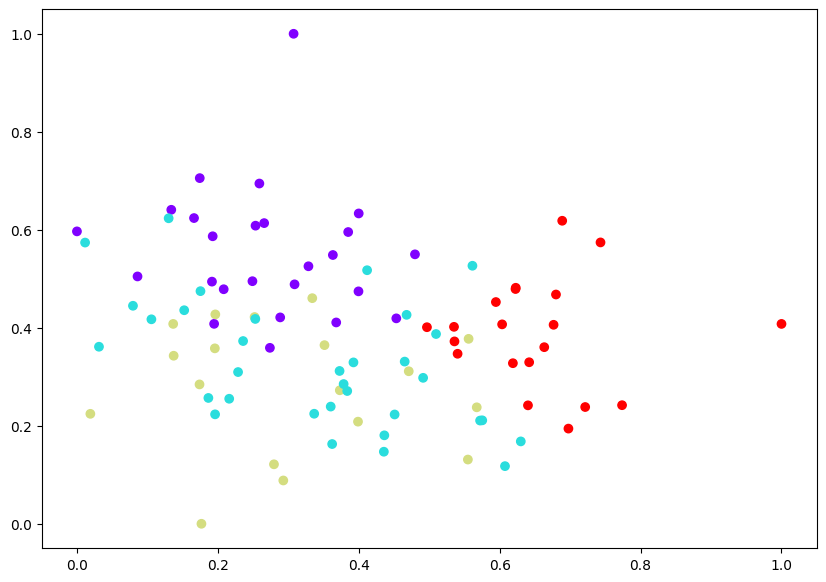

In [52]:
plt.figure(figsize=(10, 7))  
plt.scatter(zscore_df['asisten_porcen_minuto'], zscore_df['puntos_porcen_minuto'], c=cluster_kmeans.Cluster, cmap='rainbow') 

## Visualizacion en 3D

In [53]:
import plotly.express as px

fig = px.scatter_3d(zscore_df, x='asisten_porcen_minuto', y='tiempo_juego', z='edad', color=cluster_kmeans['Cluster'].astype(str))
fig.show()

### Métrica de Silueta

In [54]:
from sklearn.metrics import silhouette_score
silhouette_score(basket.values, cluster_kmeans.Cluster, metric='euclidean')

0.22198291378995924

### Referencias: 
https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/ 

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html